## Run MD with vanilla/og system and then check that difference in energies between vanilla vs hybrid system are close to 0

In [2]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt
import pickle

from simtk import openmm
from simtk.openmm import unit
import openmmtools
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache
from openmmtools.constants import kB

from perses.annihilation.lambda_protocol import RESTState, RESTCapableRelativeAlchemicalState, RESTCapableLambdaProtocol
from perses.dispersed import feptasks

import numpy as np

from perses.app.relative_point_mutation_setup import PointMutationExecutor


INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


## Test at lambda = 0

In [3]:
# htf = solvent_delivery.get_apo_htf()
with open("atp_solvent_scale_region.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [5]:
old_system = htf._topology_proposal.old_system
hybrid_system = htf.hybrid_system
for i in range(hybrid_system.getNumParticles()):
    if hybrid_system.getParticleMass(i) != old_system.getParticleMass(i):
        print(i, hybrid_system.getParticleMass(i), old_system.getParticleMass(i))

10 6.026000000000001 Da 3.0340000000000007 Da


OpenMMException: Assertion failure at System.cpp:55.  Index out of range

In [11]:
new_system = htf._topology_proposal.new_system
hybrid_system = htf.hybrid_system
for i in htf._atom_classes['unique_new_atoms']:
#     if hybrid_system.getParticleMass(i) != new_system.getParticleMass(htf._hybrid_to_new_map[i]):
    print(i, hybrid_system.getParticleMass(i), new_system.getParticleMass(htf._hybrid_to_new_map[i]))

1548 4.0 Da 4.0 Da
1549 3.0340000000000007 Da 3.0340000000000007 Da
1550 4.0 Da 4.0 Da
1551 4.0 Da 4.0 Da
1552 4.0 Da 4.0 Da
1553 13.008 Da 13.008 Da
1554 4.0 Da 4.0 Da


In [25]:
# hybrid_system.setParticleMass(10, 3.0340000000000007 * unit.amu)

In [3]:
for i in range(hybrid_system.getNumParticles()):
    print(i, hybrid_system.getParticleMass(i))

0 4.0 Da
1 3.0340000000000007 Da
2 4.0 Da
3 4.0 Da
4 12.01 Da
5 16.0 Da
6 11.018 Da
7 4.0 Da
8 9.018 Da
9 4.0 Da
10 6.026000000000001 Da
11 4.0 Da
12 4.0 Da
13 4.0 Da
14 12.01 Da
15 16.0 Da
16 11.018 Da
17 4.0 Da
18 3.0340000000000007 Da
19 4.0 Da
20 4.0 Da
21 4.0 Da
22 15.99943 Da
23 1.007947 Da
24 1.007947 Da
25 15.99943 Da
26 1.007947 Da
27 1.007947 Da
28 15.99943 Da
29 1.007947 Da
30 1.007947 Da
31 15.99943 Da
32 1.007947 Da
33 1.007947 Da
34 15.99943 Da
35 1.007947 Da
36 1.007947 Da
37 15.99943 Da
38 1.007947 Da
39 1.007947 Da
40 15.99943 Da
41 1.007947 Da
42 1.007947 Da
43 15.99943 Da
44 1.007947 Da
45 1.007947 Da
46 15.99943 Da
47 1.007947 Da
48 1.007947 Da
49 15.99943 Da
50 1.007947 Da
51 1.007947 Da
52 15.99943 Da
53 1.007947 Da
54 1.007947 Da
55 15.99943 Da
56 1.007947 Da
57 1.007947 Da
58 15.99943 Da
59 1.007947 Da
60 1.007947 Da
61 15.99943 Da
62 1.007947 Da
63 1.007947 Da
64 15.99943 Da
65 1.007947 Da
66 1.007947 Da
67 15.99943 Da
68 1.007947 Da
69 1.007947 Da
70 15.99943 

983 1.007947 Da
984 1.007947 Da
985 15.99943 Da
986 1.007947 Da
987 1.007947 Da
988 15.99943 Da
989 1.007947 Da
990 1.007947 Da
991 15.99943 Da
992 1.007947 Da
993 1.007947 Da
994 15.99943 Da
995 1.007947 Da
996 1.007947 Da
997 15.99943 Da
998 1.007947 Da
999 1.007947 Da
1000 15.99943 Da
1001 1.007947 Da
1002 1.007947 Da
1003 15.99943 Da
1004 1.007947 Da
1005 1.007947 Da
1006 15.99943 Da
1007 1.007947 Da
1008 1.007947 Da
1009 15.99943 Da
1010 1.007947 Da
1011 1.007947 Da
1012 15.99943 Da
1013 1.007947 Da
1014 1.007947 Da
1015 15.99943 Da
1016 1.007947 Da
1017 1.007947 Da
1018 15.99943 Da
1019 1.007947 Da
1020 1.007947 Da
1021 15.99943 Da
1022 1.007947 Da
1023 1.007947 Da
1024 15.99943 Da
1025 1.007947 Da
1026 1.007947 Da
1027 15.99943 Da
1028 1.007947 Da
1029 1.007947 Da
1030 15.99943 Da
1031 1.007947 Da
1032 1.007947 Da
1033 15.99943 Da
1034 1.007947 Da
1035 1.007947 Da
1036 15.99943 Da
1037 1.007947 Da
1038 1.007947 Da
1039 15.99943 Da
1040 1.007947 Da
1041 1.007947 Da
1042 15.99943 

In [4]:
for i in range(htf._topology_proposal.old_system.getNumParticles()):
    print(i, htf._topology_proposal.old_system.getParticleMass(i))

0 4.0 Da
1 3.0340000000000007 Da
2 4.0 Da
3 4.0 Da
4 12.01 Da
5 16.0 Da
6 11.018 Da
7 4.0 Da
8 9.018 Da
9 4.0 Da
10 3.0340000000000007 Da
11 4.0 Da
12 4.0 Da
13 4.0 Da
14 12.01 Da
15 16.0 Da
16 11.018 Da
17 4.0 Da
18 3.0340000000000007 Da
19 4.0 Da
20 4.0 Da
21 4.0 Da
22 15.99943 Da
23 1.007947 Da
24 1.007947 Da
25 15.99943 Da
26 1.007947 Da
27 1.007947 Da
28 15.99943 Da
29 1.007947 Da
30 1.007947 Da
31 15.99943 Da
32 1.007947 Da
33 1.007947 Da
34 15.99943 Da
35 1.007947 Da
36 1.007947 Da
37 15.99943 Da
38 1.007947 Da
39 1.007947 Da
40 15.99943 Da
41 1.007947 Da
42 1.007947 Da
43 15.99943 Da
44 1.007947 Da
45 1.007947 Da
46 15.99943 Da
47 1.007947 Da
48 1.007947 Da
49 15.99943 Da
50 1.007947 Da
51 1.007947 Da
52 15.99943 Da
53 1.007947 Da
54 1.007947 Da
55 15.99943 Da
56 1.007947 Da
57 1.007947 Da
58 15.99943 Da
59 1.007947 Da
60 1.007947 Da
61 15.99943 Da
62 1.007947 Da
63 1.007947 Da
64 15.99943 Da
65 1.007947 Da
66 1.007947 Da
67 15.99943 Da
68 1.007947 Da
69 1.007947 Da
70 15.99943

1175 1.007947 Da
1176 1.007947 Da
1177 15.99943 Da
1178 1.007947 Da
1179 1.007947 Da
1180 15.99943 Da
1181 1.007947 Da
1182 1.007947 Da
1183 15.99943 Da
1184 1.007947 Da
1185 1.007947 Da
1186 15.99943 Da
1187 1.007947 Da
1188 1.007947 Da
1189 15.99943 Da
1190 1.007947 Da
1191 1.007947 Da
1192 15.99943 Da
1193 1.007947 Da
1194 1.007947 Da
1195 15.99943 Da
1196 1.007947 Da
1197 1.007947 Da
1198 15.99943 Da
1199 1.007947 Da
1200 1.007947 Da
1201 15.99943 Da
1202 1.007947 Da
1203 1.007947 Da
1204 15.99943 Da
1205 1.007947 Da
1206 1.007947 Da
1207 15.99943 Da
1208 1.007947 Da
1209 1.007947 Da
1210 15.99943 Da
1211 1.007947 Da
1212 1.007947 Da
1213 15.99943 Da
1214 1.007947 Da
1215 1.007947 Da
1216 15.99943 Da
1217 1.007947 Da
1218 1.007947 Da
1219 15.99943 Da
1220 1.007947 Da
1221 1.007947 Da
1222 15.99943 Da
1223 1.007947 Da
1224 1.007947 Da
1225 15.99943 Da
1226 1.007947 Da
1227 1.007947 Da
1228 15.99943 Da
1229 1.007947 Da
1230 1.007947 Da
1231 15.99943 Da
1232 1.007947 Da
1233 1.007947 

In [5]:
for i in range(htf._topology_proposal.new_system.getNumParticles()):
    print(i, htf._topology_proposal.new_system.getParticleMass(i))

0 4.0 Da
1 3.0340000000000007 Da
2 4.0 Da
3 4.0 Da
4 12.01 Da
5 16.0 Da
6 11.018 Da
7 4.0 Da
8 9.018 Da
9 4.0 Da
10 9.018 Da
11 12.01 Da
12 16.0 Da
13 4.0 Da
14 3.0340000000000007 Da
15 4.0 Da
16 4.0 Da
17 4.0 Da
18 13.008 Da
19 4.0 Da
20 11.018 Da
21 4.0 Da
22 3.0340000000000007 Da
23 4.0 Da
24 4.0 Da
25 4.0 Da
26 15.99943 Da
27 1.007947 Da
28 1.007947 Da
29 15.99943 Da
30 1.007947 Da
31 1.007947 Da
32 15.99943 Da
33 1.007947 Da
34 1.007947 Da
35 15.99943 Da
36 1.007947 Da
37 1.007947 Da
38 15.99943 Da
39 1.007947 Da
40 1.007947 Da
41 15.99943 Da
42 1.007947 Da
43 1.007947 Da
44 15.99943 Da
45 1.007947 Da
46 1.007947 Da
47 15.99943 Da
48 1.007947 Da
49 1.007947 Da
50 15.99943 Da
51 1.007947 Da
52 1.007947 Da
53 15.99943 Da
54 1.007947 Da
55 1.007947 Da
56 15.99943 Da
57 1.007947 Da
58 1.007947 Da
59 15.99943 Da
60 1.007947 Da
61 1.007947 Da
62 15.99943 Da
63 1.007947 Da
64 1.007947 Da
65 15.99943 Da
66 1.007947 Da
67 1.007947 Da
68 15.99943 Da
69 1.007947 Da
70 1.007947 Da
71 15.99943

1374 1.007947 Da
1375 1.007947 Da
1376 15.99943 Da
1377 1.007947 Da
1378 1.007947 Da
1379 15.99943 Da
1380 1.007947 Da
1381 1.007947 Da
1382 15.99943 Da
1383 1.007947 Da
1384 1.007947 Da
1385 15.99943 Da
1386 1.007947 Da
1387 1.007947 Da
1388 15.99943 Da
1389 1.007947 Da
1390 1.007947 Da
1391 15.99943 Da
1392 1.007947 Da
1393 1.007947 Da
1394 15.99943 Da
1395 1.007947 Da
1396 1.007947 Da
1397 15.99943 Da
1398 1.007947 Da
1399 1.007947 Da
1400 15.99943 Da
1401 1.007947 Da
1402 1.007947 Da
1403 15.99943 Da
1404 1.007947 Da
1405 1.007947 Da
1406 15.99943 Da
1407 1.007947 Da
1408 1.007947 Da
1409 15.99943 Da
1410 1.007947 Da
1411 1.007947 Da
1412 15.99943 Da
1413 1.007947 Da
1414 1.007947 Da
1415 15.99943 Da
1416 1.007947 Da
1417 1.007947 Da
1418 15.99943 Da
1419 1.007947 Da
1420 1.007947 Da
1421 15.99943 Da
1422 1.007947 Da
1423 1.007947 Da
1424 15.99943 Da
1425 1.007947 Da
1426 1.007947 Da
1427 15.99943 Da
1428 1.007947 Da
1429 1.007947 Da
1430 15.99943 Da
1431 1.007947 Da
1432 1.007947 

In [5]:
htf.hybrid_system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b8ce9d09420> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b8d6861dde0> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b8d6861de10> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b8d6861ded0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b8d6861df60> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b8d6811b030> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b8d6811b0c0> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b8d6811b150> >]

In [6]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
1.0
0.0


In [7]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [8]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [9]:
# Run MD
hybrid = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)


/scratch/lsftmp/4086171.tmpdir/ipykernel_60976/2861022740.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [10]:
with open("hybrid_positions_atp.pickle", "wb") as f:
    pickle.dump(hybrid, f)

In [11]:
with open("hybrid_positions_atp.pickle", "rb") as f:
    hybrid = pickle.load(f)

In [12]:
# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.old_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)


# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 2 
torsion_force_index = 3 
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = True
hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx, idx in hybrid_to_bond_indices.items():
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-2] *= 0 # zero K_old
    hybrid_params[-1] *= 0 # zero K_new
    custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx, idx in hybrid_to_angle_indices.items():
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx, idx in hybrid_to_torsion_indices.items():
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 0
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)

# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for pos in tqdm_notebook(hybrid):
   
    context_og.setPositions(htf.old_positions(pos))
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
    context_hybrid.setPositions(pos)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4086171.tmpdir/ipykernel_60976/280257880.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/500 [00:00<?, ?it/s]

-22703.809449555454 kJ/mol -22703.827662761738 kJ/mol
-22056.450074555454 kJ/mol -22056.464381511738 kJ/mol
-21432.325074555454 kJ/mol -21432.337428386738 kJ/mol
-20983.254762055454 kJ/mol -20983.271022136738 kJ/mol
-20789.465699555454 kJ/mol -20789.470240886738 kJ/mol
-20749.114137055454 kJ/mol -20749.122584636738 kJ/mol
-20395.254762055454 kJ/mol -20395.265162761738 kJ/mol
-20395.965699555454 kJ/mol -20395.978053386738 kJ/mol
-20293.457887055454 kJ/mol -20293.474147136738 kJ/mol
-20450.121949555454 kJ/mol -20450.132350261738 kJ/mol
-20175.700074555454 kJ/mol -20175.716334636738 kJ/mol
-20085.778199555454 kJ/mol -20085.794459636738 kJ/mol
-20322.762574555454 kJ/mol -20322.771022136738 kJ/mol
-20231.731324555454 kJ/mol -20231.745631511738 kJ/mol
-20049.973512055454 kJ/mol -20049.989772136738 kJ/mol
-20355.520387055454 kJ/mol -20355.534694011738 kJ/mol
-20171.434449555454 kJ/mol -20171.440944011738 kJ/mol
-20163.512574555454 kJ/mol -20163.528834636738 kJ/mol
-19839.418824555454 kJ/mol -

-20349.520387055454 kJ/mol -20349.536647136738 kJ/mol
-20360.528199555454 kJ/mol -20360.538600261738 kJ/mol
-20350.442262055454 kJ/mol -20350.454615886738 kJ/mol
-20409.950074555454 kJ/mol -20409.968287761738 kJ/mol
-20076.418824555454 kJ/mol -20076.435084636738 kJ/mol
-20202.246949555454 kJ/mol -20202.265162761738 kJ/mol
-20307.950074555454 kJ/mol -20307.970240886738 kJ/mol
-20411.028199555454 kJ/mol -20411.034694011738 kJ/mol
-20278.387574555454 kJ/mol -20278.409694011738 kJ/mol
-20090.059449555454 kJ/mol -20090.073756511738 kJ/mol
-20171.700074555454 kJ/mol -20171.720240886738 kJ/mol
-19995.520387055454 kJ/mol -19995.536647136738 kJ/mol
-19914.684449555454 kJ/mol -19914.692897136738 kJ/mol
-20211.231324555454 kJ/mol -20211.247584636738 kJ/mol
-20109.340699555454 kJ/mol -20109.356959636738 kJ/mol
-19869.746949555454 kJ/mol -19869.761256511738 kJ/mol
-20277.246949555454 kJ/mol -20277.263209636738 kJ/mol
-20222.950074555454 kJ/mol -20222.966334636738 kJ/mol
-20104.145387055454 kJ/mol -

-20367.051637055454 kJ/mol -20367.067897136738 kJ/mol
-20224.692262055454 kJ/mol -20224.704615886738 kJ/mol
-20454.762574555454 kJ/mol -20454.778834636738 kJ/mol
-20283.965699555454 kJ/mol -20283.980006511738 kJ/mol
-20301.606324555454 kJ/mol -20301.614772136738 kJ/mol
-20084.637574555454 kJ/mol -20084.649928386738 kJ/mol
-19826.871949555454 kJ/mol -19826.884303386738 kJ/mol
-20153.723512055454 kJ/mol -20153.731959636738 kJ/mol
-19741.301637055454 kJ/mol -19741.317897136738 kJ/mol
-20121.137574555454 kJ/mol -20121.149928386738 kJ/mol
-20282.926637055454 kJ/mol -20282.935084636738 kJ/mol
-20311.028199555454 kJ/mol -20311.044459636738 kJ/mol
-19904.246949555454 kJ/mol -19904.257350261738 kJ/mol
-20216.090699555454 kJ/mol -20216.106959636738 kJ/mol
-20220.543824555454 kJ/mol -20220.552272136738 kJ/mol
-20334.832887055454 kJ/mol -20334.841334636738 kJ/mol
-20275.840699555454 kJ/mol -20275.856959636738 kJ/mol
-20197.137574555454 kJ/mol -20197.147975261738 kJ/mol
-20074.434449555454 kJ/mol -

-20447.793824555454 kJ/mol -20447.804225261738 kJ/mol
-20303.246949555454 kJ/mol -20303.255397136738 kJ/mol
-20132.325074555454 kJ/mol -20132.333522136738 kJ/mol
-20166.348512055454 kJ/mol -20166.362819011738 kJ/mol
-20143.161012055454 kJ/mol -20143.171412761738 kJ/mol
-20140.918824555454 kJ/mol -20140.938990886738 kJ/mol
-20149.981324555454 kJ/mol -20149.993678386738 kJ/mol
-20434.871949555454 kJ/mol -20434.888209636738 kJ/mol
-20055.786012055454 kJ/mol -20055.798365886738 kJ/mol
-20251.504762055454 kJ/mol -20251.513209636738 kJ/mol
-19798.371949555454 kJ/mol -19798.382350261738 kJ/mol
-19768.973512055454 kJ/mol -19768.989772136738 kJ/mol
-19618.731324555454 kJ/mol -19618.743678386738 kJ/mol
-19964.450074555454 kJ/mol -19964.464381511738 kJ/mol
-19906.387574555454 kJ/mol -19906.399928386738 kJ/mol
-19983.684449555454 kJ/mol -19983.704615886738 kJ/mol
-19873.856324555454 kJ/mol -19873.860865886738 kJ/mol
-19707.778199555454 kJ/mol -19707.798365886738 kJ/mol
-19917.168824555454 kJ/mol -

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

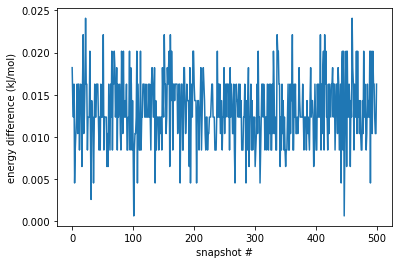

In [13]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference (kJ/mol)")
plt.xlabel("snapshot #")
plt.show()

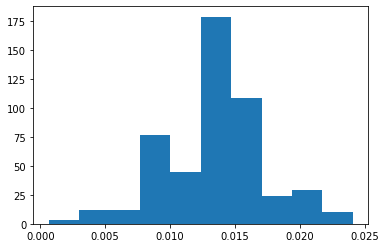

In [14]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [15]:
with open("energies_atp_hybrid.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_atp_og.pickle", "wb") as f:
    pickle.dump(energies_og, f)

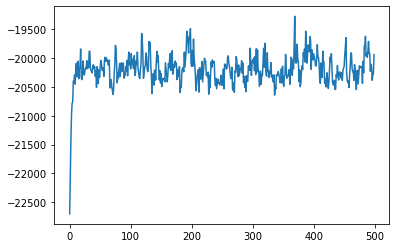

In [16]:
plt.plot(energies_hybrid)
plt.show()

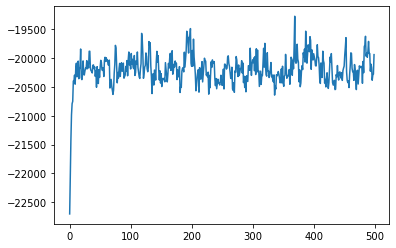

In [17]:
plt.plot(energies_og)
plt.show()

## Test at lambda = 1

In [18]:
# htf = solvent_delivery.get_apo_htf()
with open("atp_solvent_scale_region.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [19]:
htf.hybrid_system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b4ddfe795a0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b4ddfe79360> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b4ddfe79570> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b4df3a25ed0> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b4df3a25d50> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2b4df3a25cf0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b4df3a25c30> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b4df3a25cc0> >]

In [20]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
0.0
1.0


In [21]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [22]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [23]:
# Run MD
hybrid = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)


/scratch/lsftmp/4086171.tmpdir/ipykernel_60976/2861022740.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
with open("hybrid_positions_atp_lambda_1.pickle", "wb") as f:
    pickle.dump(hybrid, f)

In [25]:
with open("hybrid_positions_atp_lambda_1.pickle", "rb") as f:
    hybrid = pickle.load(f)

In [31]:
# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.new_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)


# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 2 
torsion_force_index = 3 
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = False
hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx, idx in hybrid_to_bond_indices.items():
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-2] *= 0 # zero K_old
    hybrid_params[-1] *= 0 # zero K_new
    custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx, idx in hybrid_to_angle_indices.items():
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx, idx in hybrid_to_torsion_indices.items():
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)

# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for pos in tqdm_notebook(hybrid):
   
    context_og.setPositions(htf.new_positions(pos))
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
    context_hybrid.setPositions(pos)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4086171.tmpdir/ipykernel_60976/982440890.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/500 [00:00<?, ?it/s]

-22763.57245017565 kJ/mol -22763.579143530827 kJ/mol
-21645.00213767565 kJ/mol -21645.014690405827 kJ/mol
-21327.02557517565 kJ/mol -21327.032268530827 kJ/mol
-21251.38495017565 kJ/mol -21251.391643530827 kJ/mol
-20913.32245017565 kJ/mol -20913.331096655827 kJ/mol
-20740.31463767565 kJ/mol -20740.325237280827 kJ/mol
-20465.09588767565 kJ/mol -20465.110393530827 kJ/mol
-20606.83026267565 kJ/mol -20606.844768530827 kJ/mol
-20404.46307517565 kJ/mol -20404.473674780827 kJ/mol
-19980.40057517565 kJ/mol -19980.418987280827 kJ/mol
-20583.74432517565 kJ/mol -20583.754924780827 kJ/mol
-20265.11932517565 kJ/mol -20265.129924780827 kJ/mol
-20562.10370017565 kJ/mol -20562.114299780827 kJ/mol
-20227.16620017565 kJ/mol -20227.174846655827 kJ/mol
-20413.13495017565 kJ/mol -20413.153362280827 kJ/mol
-20484.52557517565 kJ/mol -20484.543987280827 kJ/mol
-20571.11151267565 kJ/mol -20571.126018530827 kJ/mol
-20655.19745017565 kJ/mol -20655.210002905827 kJ/mol
-20352.67401267565 kJ/mol -20352.682659155827 

-20203.60370017565 kJ/mol -20203.614299780827 kJ/mol
-20584.24432517565 kJ/mol -20584.258831030827 kJ/mol
-20617.24432517565 kJ/mol -20617.258831030827 kJ/mol
-20631.67401267565 kJ/mol -20631.688518530827 kJ/mol
-20576.22870017565 kJ/mol -20576.243206030827 kJ/mol
-20606.60370017565 kJ/mol -20606.618206030827 kJ/mol
-20881.65057517565 kJ/mol -20881.665081030827 kJ/mol
-20758.24432517565 kJ/mol -20758.254924780827 kJ/mol
-20420.61151267565 kJ/mol -20420.626018530827 kJ/mol
-20638.80682517565 kJ/mol -20638.821331030827 kJ/mol
-20858.65838767565 kJ/mol -20858.676799780827 kJ/mol
-21000.26776267565 kJ/mol -21000.282268530827 kJ/mol
-21023.89276267565 kJ/mol -21023.903362280827 kJ/mol
-20793.97088767565 kJ/mol -20793.985393530827 kJ/mol
-20769.41620017565 kJ/mol -20769.430706030827 kJ/mol
-20771.20526267565 kJ/mol -20771.223674780827 kJ/mol
-20970.19745017565 kJ/mol -20970.211956030827 kJ/mol
-20543.24432517565 kJ/mol -20543.258831030827 kJ/mol
-20713.93963767565 kJ/mol -20713.954143530827 

-20563.26776267565 kJ/mol -20563.278362280827 kJ/mol
-20485.33807517565 kJ/mol -20485.348674780827 kJ/mol
-20508.10370017565 kJ/mol -20508.118206030827 kJ/mol
-20288.22870017565 kJ/mol -20288.239299780827 kJ/mol
-20014.75995017565 kJ/mol -20014.766643530827 kJ/mol
-19859.68182517565 kJ/mol -19859.700237280827 kJ/mol
-20015.06463767565 kJ/mol -20015.075237280827 kJ/mol
-20180.78338767565 kJ/mol -20180.795940405827 kJ/mol
-20246.75995017565 kJ/mol -20246.774456030827 kJ/mol
-20086.21307517565 kJ/mol -20086.227581030827 kJ/mol
-19505.30682517565 kJ/mol -19505.317424780827 kJ/mol
-20013.21307517565 kJ/mol -20013.217815405827 kJ/mol
-20304.69745017565 kJ/mol -20304.711956030827 kJ/mol
-20300.12713767565 kJ/mol -20300.137737280827 kJ/mol
-20432.08807517565 kJ/mol -20432.098674780827 kJ/mol
-20186.74432517565 kJ/mol -20186.756877905827 kJ/mol
-19673.69745017565 kJ/mol -19673.715862280827 kJ/mol
-20163.88495017565 kJ/mol -20163.891643530827 kJ/mol
-20303.43182517565 kJ/mol -20303.438518530827 

-20424.43182517565 kJ/mol -20424.448284155827 kJ/mol
-20465.97870017565 kJ/mol -20465.997112280827 kJ/mol
-20316.71307517565 kJ/mol -20316.721721655827 kJ/mol
-20247.90057517565 kJ/mol -20247.918987280827 kJ/mol
-20303.05682517565 kJ/mol -20303.071331030827 kJ/mol
-20436.83807517565 kJ/mol -20436.860393530827 kJ/mol
-20498.19745017565 kJ/mol -20498.208049780827 kJ/mol
-20521.76776267565 kJ/mol -20521.782268530827 kJ/mol
-20893.83026267565 kJ/mol -20893.844768530827 kJ/mol
-20618.07245017565 kJ/mol -20618.092815405827 kJ/mol
-20568.04901267565 kJ/mol -20568.063518530827 kJ/mol
-20204.59588767565 kJ/mol -20204.610393530827 kJ/mol
-20065.02557517565 kJ/mol -20065.040081030827 kJ/mol
-20331.03338767565 kJ/mol -20331.045940405827 kJ/mol
-20325.18963767565 kJ/mol -20325.206096655827 kJ/mol
-20271.32245017565 kJ/mol -20271.325237280827 kJ/mol
-20505.38495017565 kJ/mol -20505.403362280827 kJ/mol
-20828.99432517565 kJ/mol -20829.004924780827 kJ/mol
-20707.08807517565 kJ/mol -20707.104534155827 

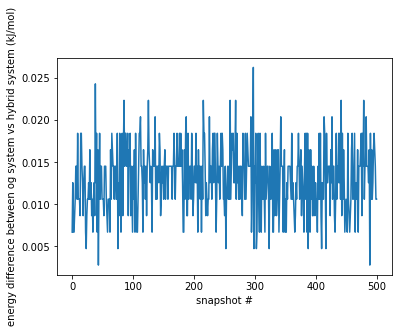

In [32]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference between og system vs hybrid system (kJ/mol)")
plt.xlabel("snapshot #")
plt.show()

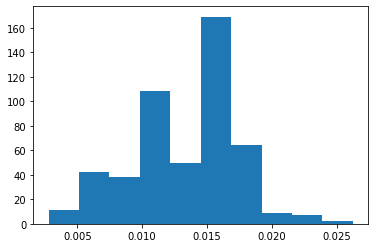

In [33]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [34]:
with open("energies_atp_hybrid_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_atp_og_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_og, f)